In [9]:
import networkx as nx
import numpy as np
from deepwalk import DeepWalk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load data

In [10]:
G = nx.read_adjlist("karate_club.adjlist", nodetype=int)
adj = nx.to_numpy_array(G)
labels = np.loadtxt("karate_label.txt")

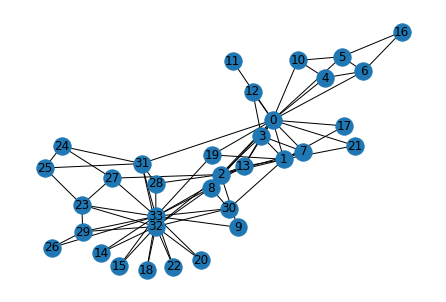

In [11]:
nx.draw(G, with_labels=True)

# Set hyperparameters

In [12]:
dim = 256
lr = 0.00005
walk_length = 10
window_size = 1
walks_per_vertex = 5
epochs = 100

# Training

In [13]:
deepwalk = DeepWalk(walk_number=walks_per_vertex,
                    walk_length=walk_length,
                    n_emb_dim=dim,
                    window_size=window_size,
                    epochs=epochs,
                    learning_rate=lr)

In [14]:
result = deepwalk.fit(graph=G)

/opt/homebrew/Caskroom/miniconda/base/envs/NetSci/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/opt/homebrew/Caskroom/miniconda/base/envs/NetSci/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


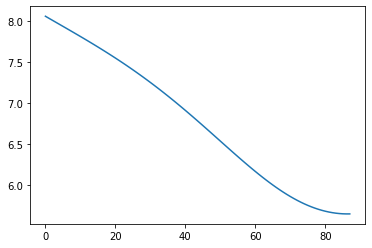

In [15]:
plt.plot(result)

# Visualize embeddings with t-sne

/opt/homebrew/Caskroom/miniconda/base/envs/NetSci/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


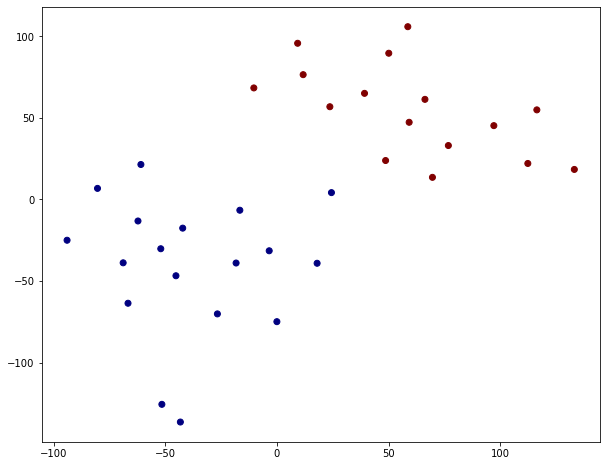

In [25]:
# load the node embedding vector that has been trained. (34, 4) dimension
node_emb = np.copy(deepwalk.model.hidden_weight)

# a parameter for dimension reduction
n_components = 2

# transform the node embedding vector size from (34, 4) into (34, 2) with a T-SNE model
model = TSNE(n_components=n_components, learning_rate=100, perplexity=8)
node_emb_2d = model.fit_transform(node_emb)

# separate the x-axis values and y-axis values
x = node_emb_2d[:, 0]
y = node_emb_2d[:, 1]

# set color options from the labels.
node_colours = labels[:, -1]

# scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=node_colours, cmap="jet")
plt.show()